# 算法一：二分法搜索

## 1. 相关知识

- 基本原理：**函数零点存在性定理**  
    对于连续函数$f(x)$构成的方程：$f(x) = 0$ ，如果在区间$[a,b]$上满足：$f(a) f(b) < 0$ ，则区间$[a,b]$内至少存在一点$\epsilon$，使得$f(\epsilon) = 0$ 。

- 简单推导：<br>
    取区间中点$c = \dfrac{a+b} 2$，如果$f(a) f(c) < 0$，则根位于区间$[a,c]$内；否则根位于区间$[c,b]$内。对根存在的区间继续取中点，以此类推，直到当前根（cur_root）的函数值小于可接受误差为止。

## 2.  求解2021的9次方根

In [83]:
print("请输入正被开方数y与正整数n") # 限制在实数范围的内开方运算
def myPow(y,n):
    epsilon = 0.000001
    low = min(1.0,y)
    high = max(1.0,y)
    m = (low + high)/ 2.0   
    while abs(m**n - y)> epsilon:  
        if  m**n - y > 0:
            high = m
        else:
            low = m
        m = (low+high)/ 2.0
    return m

请输入正被开方数y与正整数n


In [84]:
myPow(2021,9)

2.329620320977938

# 算法二：梯度下降

## 1. 相关知识

- 基本原理：     
   假设一位测量员站在某个山峰的峰顶，他要在天黑前到达山谷的供给站。如果不考虑下山的安全性，那么最快的方法就是以当前的位置为基准，寻找该位置最陡峭的地方，然后沿该方向往下走；走过一段距离后，再以当前位置为基准，重新寻找最陡峭的地方，直到最低处。然而下山的路径只能够根据每一次停留时的探测决定，测量又会造成耗时。因此他需要确定一个`合适的测量方向的频率`，来确保既能到达供给点，又不至于耗时太多。
   梯度下降的基本过程就和下山的场景很类似。首先，我们有一个`可微分`的函数。这个函数就代表着一座山。我们的目标就是找到这个函数的最小值，也就是山底。根据之前的场景假设，最快的下山的方式就是找到当前位置最陡峭的方向，然后沿着此方向向下走，对应到函数中，就是找到给定点的梯度 ，然后朝着梯度相反的方向，就能让函数值下降的最快！因为梯度的方向就是函数之变化最快的方向。

- 简单推导：<br>
  `梯度（gradient） ` $\nabla$  
  \begin{array}{cc}
  \nabla f(x)=\dfrac{\partial f(x)}{\partial x_1} \vec{e_{x1}} +\dfrac{\partial f(x)}{\partial x_2} \vec{e_{x2}}+ ...+\dfrac{\partial f(x)}{\partial x_n} \vec{e_{xn}} \\\\   
  =[\dfrac{\partial f(x)}{\partial x_1}, \dfrac{\partial f(x)}{\partial x_2}, ..., \dfrac{\partial f(x)}{\partial x_n}]^T 
  \end{array}  
   即上述的“山坡陡峭程度”。梯度是一个向量，梯度的方向是函数在指定点上升最快的方向，那么梯度的反方向自然是下降最快的方向了。
  `步长（learning rate）` $\alpha$  
  步长决定了在梯度下降迭代的过程中，每一步沿梯度负方向前进的长度。  
  `损失函数（cost function/loss function）` $L(x)$  
  $$L(x)=\dfrac{1}{2}(x^n - y)^2 $$  
  为了评估模型拟合的好坏，通常用损失函数来度量拟合的程度。损失函数极小化，意味着拟合程度最好，对应的模型参数即为最优参数。
  
  **将求$n$次方根的问题转化为优化问题(极值问题)。构造损失$L(x)$，寻找使$L(x)$最小的$x$ ，使之满足$x^n=y$。**
  $$x_{n+1}=x_n - \alpha L'(x_n)$$

## 2. 求解2021的9次方根
`不知道哪里出现了问题，希望老师指点`

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline

# 梯度下降算法定义
print("请输入步长alpha、正被开方数y与正整数n")
def gradient_descent(alpha,y,n):
    plt.xlabel("$X$")
    plt.ylabel("L")
    plt.title("$L=l(x)$") 
    
# 损失函数定义
def mylost(x):
    x = y / 2
    l = ((x^n - y)^2 )/2 
    return l
    
    epsilon = 0.000001
    while l > epsilon: 
        x = x - alpha * (x-y) * (n * x^(n-1)) 
        y = l
        print("第%d次迭代：x=%f，y=%f" % (i + 1, x, y))
        plt.plot(x, l, "r.")
        return (x)

请输入步长alpha、正被开方数y与正整数n


x


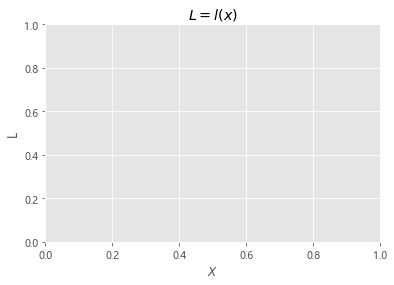

In [154]:
gradient_descent(0.1,2021,9)
print(x)

SyntaxError: 'return' outside function (<ipython-input-158-432b271bdb4a>, line 2)

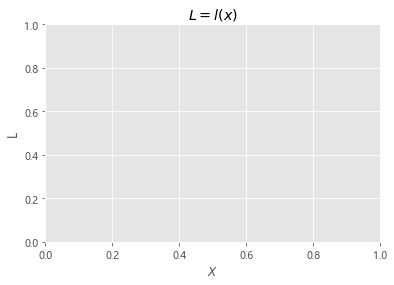

In [158]:
gradient_descent(0.01,2021,9)
return (x)

# 算法三： 牛顿迭代法

## 1. 相关知识

- 基本原理：  
    在已知方程$f(x)=0$的零点处做曲线的切线，其切线函数为$f(x)$的一阶泰勒展开式$p(x)$。通过这样的代替（即方程转化为$p(x)=0$）可以得到相对容易求解的多项式方程，从而近似地表示原方程零点。
- 简单推导  
    `一阶泰勒展开式`
$$p(x)=f(x_0)=f'(x_0)(x-x_0)$$
    **通过反复迭代，得到格式**
$$x_{n+1}=x_n - \dfrac{f(x_n)}{f’(x_n)}$$

## 2. 求解2021的9次方根
这段代码主要借鉴自[CSDN一篇博客](URL 'https://blog.csdn.net/weixin_48615832/article/details/109285701')

迭代第202次后，误差为0
所求方程式的根为2.32962032098793


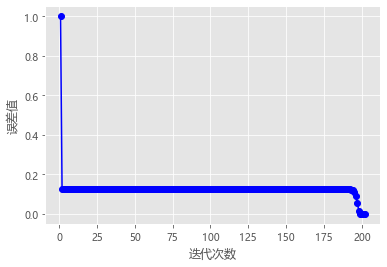

In [160]:
import matplotlib.pyplot as plt

x0 = 0.1
x_list = [x0]
x_values = []
y_values = []
i = 0

def f(x):
    f = x**9 - 2021
    return f

while True:
    if diff(f(x),x).subs(x,x0) == 0:
        print('极值点：',x0)
        break
# math_expression.subs(variable, substitute) 可将数学表达式中的变量或表达式的所有实例替换为其他变量或表达式或值。
# diff(func,x,n) func-要求导的函数，x-要对其求导的变量，n是可选的，表示求n阶导数，默认一阶。（与Linux用法不一样）
    else: 
        x0 = x0 - f(x0)/diff(f(x),x).subs(x,x0) 
        x_list.append(x0)
# list.append(obj) obj参数 - 添加到列表末尾的对象。 该方法无返回值，但是会修改原来的列表。
    if len(x_list) > 1:
# len(list) list参数 - 要计算元素个数的列表。返回值 - 返回列表元素个数;当对象是字符串时，返回字符串中的字符数。
        i += 1
        error = abs((x_list[-1] - x_list[-2]) / x_list[-1])
        x_values.append(i)
# dict.values()  返回值 - 返回字典中的所有值。 可以利用通配符
        y_values.append(error)
        if error == 0:
            print(f'迭代第{i}次后，误差为0')
            break
    else:
        pass

print(f'所求方程式的根为{x_list[-1]}')
plt.plot(x_values,y_values,color = 'blue',marker = 'o')
plt.xlabel('迭代次数')
plt.ylabel('误差值')
plt.show()